<a href="https://colab.research.google.com/github/DataGF/machine-learning/blob/master/covid19ImgPneumoniaClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Image Pneumonia Classification

## Clone and Explore Dataset

In [1]:
# Import libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Clone Dataset
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 38.81 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
# Import os library and manipulate paths
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
# Define variable with a list containing the names of the images and print first 10 of each
train_covid_names = os.listdir(train_covid_dir)
print('Train Covid Names: ', train_covid_names[:10])
train_normal_names = os.listdir(train_normal_dir)
print('Train Normal Names: ', train_normal_names[:10])
test_covid_names = os.listdir(test_covid_dir)
print('Test Covid Names: ', test_covid_names[:10])
test_normal_names = os.listdir(test_normal_dir)
print('Test Normal Names: ', test_normal_names[:10])

Train Covid Names:  ['COVID19(497).jpg', 'COVID19(122).jpg', 'COVID-19 (331).jpg', 'COVID19(149).jpg', 'COVID-19 (173).jpg', 'COVID19(558).jpg', 'COVID-19 (195).jpg', 'COVID19(54).jpg', 'COVID-19 (15).jpg', 'COVID19(117).jpg']
Train Normal Names:  ['NORMAL(311).jpg', 'NORMAL(898).jpg', 'NORMAL(287).jpg', 'NORMAL(1457).jpg', 'NORMAL(34).jpg', 'NORMAL(441).jpg', 'NORMAL(1474).jpg', 'NORMAL(584).jpg', 'NORMAL(1482).jpg', 'NORMAL(456).jpg']
Test Covid Names:  ['COVID-19 (713).jpg', 'COVID-19 (516).jpg', 'COVID19(164).jpg', 'COVID19(423).jpg', 'COVID-19 (709).jpg', 'COVID19(13).jpg', 'COVID19(427).jpg', 'COVID19(304).jpg', 'COVID19(541).jpg', 'COVID19(518).jpg']
Test Normal Names:  ['NORMAL(709).jpg', 'NORMAL(1195).jpg', 'NORMAL(1283).jpg', 'NORMAL(725).jpg', 'NORMAL(1044).jpg', 'NORMAL(1201).jpg', 'NORMAL(970).jpg', 'NORMAL(1190).jpg', 'NORMAL(443).jpg', 'NORMAL(1292).jpg']


In [5]:
# Show the number of each images group
print('Number of training images for covid: ', len(train_covid_names))
print('Number of training images for normal: ', len(train_normal_names))
print('Number of testing images for covid: ', len(test_covid_names))
print('Number of testing images for normal: ', len(test_normal_names))
print('Total number of training images: ', len(train_covid_names + train_normal_names))
print('Total number of testing images: ', len(test_covid_names + test_normal_names))

Number of training images for covid:  545
Number of training images for normal:  1266
Number of testing images for covid:  167
Number of testing images for normal:  317
Total number of training images:  1811
Total number of testing images:  484


## Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(497).jpg', '/content/datasets/Data/train/COVID19/COVID19(122).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (331).jpg', '/content/datasets/Data/train/COVID19/COVID19(149).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (173).jpg', '/content/datasets/Data/train/COVID19/COVID19(558).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (195).jpg', '/content/datasets/Data/train/COVID19/COVID19(54).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(311).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(898).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(287).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1457).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(34).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(441).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1474).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(584).jpg']


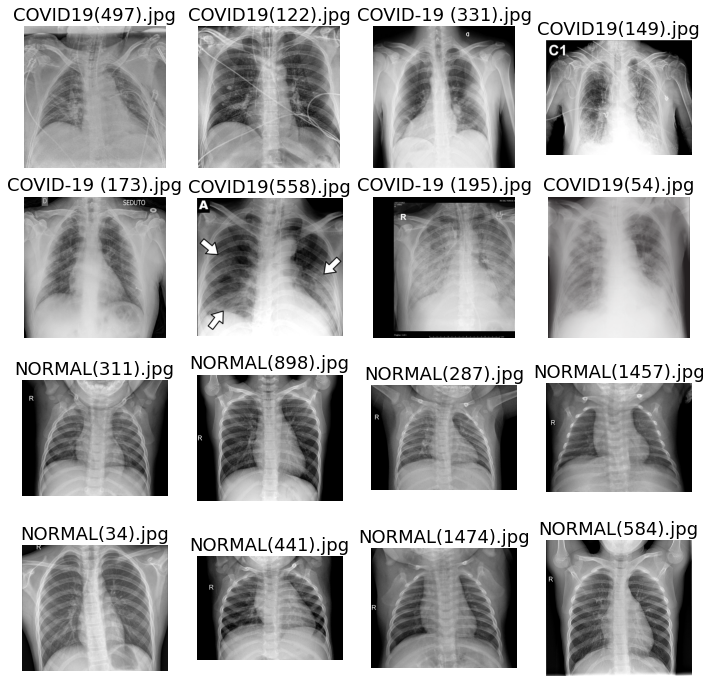

In [8]:
# Import matplotlib for data visualization
import matplotlib.image as mpimg

# Set the number of columns and rows
nrows = 4
ncols = 4

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(12, 12)

# Get the filenames from the covid and normal dir of the train dataset and print their values
next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]
print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic + next_normal_pic):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=18)
  plt.imshow(img, cmap='gray')

plt.show()

## Data Augmentation and Normalization

In [10]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150, 150),                                                    
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [13]:
print(train_generator.class_indices, train_generator.image_shape)
print(validation_generator.class_indices, validation_generator.image_shape)
print(test_generator.class_indices, test_generator.image_shape)

{'COVID19': 0, 'NORMAL': 1} (150, 150, 3)
{'COVID19': 0, 'NORMAL': 1} (150, 150, 3)
{'COVID19': 0, 'NORMAL': 1} (150, 150, 3)


## Convolutional Neural Network (CNN) Model

### 2D Visualization of a CNN: https://cs.ryerson.ca/~aharley/vis/conv/flat.html

In [17]:
# Model
model = Sequential()

# Add the convolutional layer, filter, size of filters, padding, activation function, input shape
model.add(Conv2D(32, (5, 5), padding='SAME', activation='relu', input_shape=(150, 150, 3)))

# Add pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer (0.5 dropout rate is recommended, half input nodes will be dropped at each update)
model.add(Dropout(0.5))

# Add another convolutional layer
model.add(Conv2D(64, (5, 5), padding='SAME', activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Place another dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimentional array
model.add(Flatten())

# Add a dense layer: amount of nodes, activation
model.add(Dense(256, activation='relu'))

# Add another dropout layer
model.add(Dropout(0.5))

# Add another dense layer
model.add(Dense(1, activation='sigmoid'))

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

## Compile and Train CNN Model

In [19]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data = validation_generator,
                    validation_steps = 11) # validation steps is approximately the value of validation generator images divided by batch size

Epoch 1/30
46/46 [==============================] - 49s 1s/step - loss: 0.9794 - accuracy: 0.7619 - val_loss: 0.5419 - val_accuracy: 0.9148
Epoch 2/30
46/46 [==============================] - 50s 1s/step - loss: 0.2520 - accuracy: 0.9013 - val_loss: 0.3447 - val_accuracy: 0.9403
Epoch 3/30
46/46 [==============================] - 51s 1s/step - loss: 0.2070 - accuracy: 0.9268 - val_loss: 0.3009 - val_accuracy: 0.9602
Epoch 4/30
46/46 [==============================] - 50s 1s/step - loss: 0.1832 - accuracy: 0.9372 - val_loss: 0.2254 - val_accuracy: 0.9602
Epoch 5/30
46/46 [==============================] - 50s 1s/step - loss: 0.1926 - accuracy: 0.9324 - val_loss: 0.1332 - val_accuracy: 0.9688
Epoch 6/30
46/46 [==============================] - 50s 1s/step - loss: 0.1792 - accuracy: 0.9427 - val_loss: 0.2857 - val_accuracy: 0.9290
Epoch 7/30
46/46 [==============================] - 49s 1s/step - loss: 0.1520 - accuracy: 0.9545 - val_loss: 0.1061 - val_accuracy: 0.9631
Epoch 8/30
46/46 [==

## Performance Evaluation and Testing Model

In [21]:
# Keys of the model
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

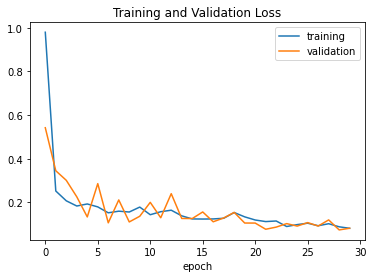

In [22]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

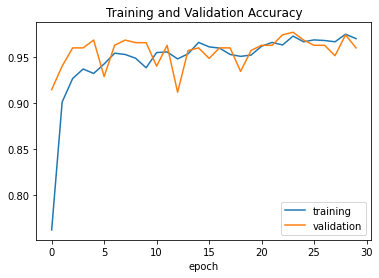

In [23]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [24]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc: {} test loss: {}'.format(test_acc, test_loss))

16/16 [==============================] - 10s 644ms/step - loss: 0.1120 - accuracy: 0.9566
test acc: 0.9566115736961365 test loss: 0.11203381419181824


In [25]:
# Test the model with some images downloaded from google images
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid-19')
  else:
    print('Normal')

Saving Normal.jpg to Normal.jpg
Saving Covid19.jpg to Covid19.jpg
/content/Normal.jpg
Normal.jpg
Normal
/content/Covid19.jpg
Covid19.jpg
Covid-19


In [26]:
# Save the model
model.save('model_covd_img_class.v1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_covd_img_class.v1/assets


In [27]:
# Download the model
from google.colab import files
files.download('model_covd_img_class.v1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>